#### Week 5 handin Panda

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs


## 02 Status
Did exercise one, the mandatory one.


## 03 Solution

In [1]:
#A What is the change in pct of divorced danes from 2008 to 2020?
import pandas as pd
data=pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Default&delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=*&Tid=2008K1%2C2020K1',delimiter=';')
data['TID'] = data['TID'].map(lambda x:x[:-2])# remove K1 from TID

divorced2008=data.loc[(data['TID']=='2008') & (data['CIVILSTAND']=='Fraskilt') & (data['OMRÅDE']=='Hele landet')].iloc[0,3]
divorced2020=data.loc[(data['TID']=='2020') & (data['CIVILSTAND']=='Fraskilt') & (data['OMRÅDE']=='Hele landet')].iloc[0,3]


total2008=data.loc[(data['TID']=='2008') & (data['CIVILSTAND']=='I alt') & (data['OMRÅDE']=='Hele landet')].iloc[0,3]
total2020=data.loc[(data['TID']=='2020') & (data['CIVILSTAND']=='I alt') & (data['OMRÅDE']=='Hele landet')].iloc[0,3]

percent2008=divorced2008/total2008*100
percent2020=divorced2020/total2020*100

print('2008: \nDivorced: {} Total: {}\nPercentage: {}\n'.format(divorced2008,total2008,round(percent2008,2)))
print('2020: \nDivorced: {} Total: {}\nPercentage: {}\n'.format(divorced2020,total2020,round(percent2020,2)))
print('The divorce percentage has risen {}\n'.format(round(percent2020-percent2008,2)))


2008: 
Divorced: 428864 Total: 5475791
Percentage: 7.83

2020: 
Divorced: 544588 Total: 5822763
Percentage: 9.35

The divorce percentage has risen 1.52



In [2]:
#B Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

top5_cities=data.loc[data['CIVILSTAND']=='I alt'].loc[data['TID']=='2020'].sort_values(by=['INDHOLD'],ascending=False).iloc[1:6,:]

def nm_percent (omr):
    nevermarried2020=data.loc[data['OMRÅDE']==omr].loc[data['CIVILSTAND']=='Ugift'].loc[data['TID']=='2020'].iloc[0,3]
    total2020=data.loc[data['OMRÅDE']==omr].loc[data['CIVILSTAND']=='I alt'].loc[data['TID']=='2020'].iloc[0,3]
    return(nevermarried2020/total2020*100)


top5_cities['nmp']=top5_cities['OMRÅDE'].apply(nm_percent)
top5_cities=top5_cities.sort_values(by=['nmp'],ascending=False)
name=top5_cities.iloc[0,0]
nmp=top5_cities.iloc[0,4]

print('The top5 city with most "Never Married" in 2020 is {} it has a "never married percentage" of {}'.format(name,round(nmp,1)) )                                                                                                                              


The top5 city with most "Never Married" in 2020 is København it has a "never married percentage" of 65.2


<AxesSubplot:xlabel='TID'>

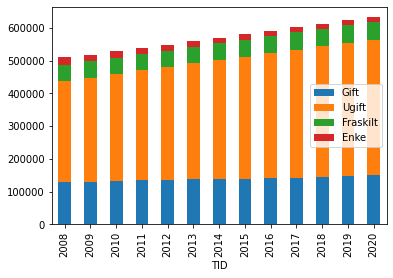

In [3]:
#C Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

data=pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Default&delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=*&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1',delimiter=';')
data['TID'] = data['TID'].map(lambda x:x[:-2])# remove K1 from TID
data.set_index('TID')

fraskilt=data.loc[data['CIVILSTAND']=='Fraskilt'][['TID','INDHOLD']].set_index('TID').rename(columns={'INDHOLD': 'Fraskilt'})
gift=data.loc[data['CIVILSTAND']=='Gift/separeret'][['TID','INDHOLD']].set_index('TID').rename(columns={'INDHOLD': 'Gift'})
ugift=data.loc[data['CIVILSTAND']=='Ugift'][['TID','INDHOLD']].set_index('TID').rename(columns={'INDHOLD': 'Ugift'})
enke=data.loc[data['CIVILSTAND']=='Enke/enkemand'][['TID','INDHOLD']].set_index('TID').rename(columns={'INDHOLD': 'Enke'})
samlet=pd.concat((gift,ugift,fraskilt,enke),axis=1)
samlet.plot.bar(stacked=True)

<AxesSubplot:title={'center':'Gift/ugifte danskere i 2020'}, xlabel='ALDER'>

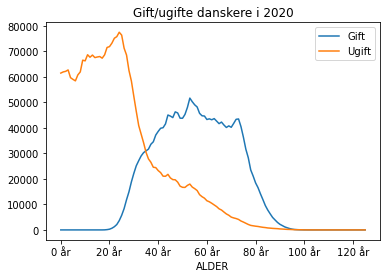

In [4]:
#Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
data=pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Default&delimiter=Semicolon&OMR%C3%85DE=000&ALDER=*&CIVILSTAND=U%2CG&Tid=2020K1',delimiter=';')

ugift2020=data.loc[(data['CIVILSTAND']=='Ugift')][['ALDER','INDHOLD']].set_index('ALDER').rename(columns={'INDHOLD': 'Ugift'})
gift2020=data.loc[(data['CIVILSTAND']=='Gift/separeret')][['ALDER','INDHOLD']].set_index('ALDER').rename(columns={'INDHOLD': 'Gift'})
samlet2020=pd.concat((gift2020,ugift2020),axis=1)
samlet2020=samlet2020.iloc[1:,0:3]

samlet2020.plot(title = 'Gift/ugifte danskere i 2020')
